## Logistic Regression
This data set contains 3 classes. we are going to construct a **multiclPass logistic regression model** with the softmax transformation as p(Ck|ϕ) = yk(ϕ) = exp(ak)/ SUM(exp(aj)). The error function is formed by using the **cross-
entropy function as E(w) = -SUM(SUM(tnk*ln ynk))**

In [199]:
## import lib
import pandas as pd
import numpy as np
from numpy.linalg import pinv,inv,matrix_power
from scipy.linalg import sqrtm
from scipy.io import loadmat
import itertools
import math
import csv

In [200]:
# load data
data_dir = './Data/'
train_f = 'train.csv'
test_f = 'test.csv'
df_tr = pd.read_csv(data_dir+train_f,header=None)
df_ts = pd.read_csv(data_dir+test_f,header=None)
tN = df_tr.iloc[:,:3].as_matrix()
xN_tr = df_tr.iloc[:,3:].as_matrix() 
xN_ts = df_ts.iloc[:,:].as_matrix() 
trainN = len(xN_tr)
testN = len(xN_ts)
classN = len(tN[0])

# add the constant term
# xN_tr = np.hstack((np.array(np.ones(trainN))[:, np.newaxis], xN_tr))
# xN_ts = np.hstack((np.array(np.ones(testN))[:, np.newaxis], xN_ts))
feat_dim = len(xN_tr[0])

# turn 1-to-K encoding into single classificaion
gt_y = []
for idx, ele in enumerate(tN):
    cls = list(ele).index(max(ele))
    gt_y.append(cls)
    
# print(gt_y)
# print(xN[0])
# print(tN[0][1])
# print(xN_ts.shape)

## Training Stage
### show the Error converge rate & Accuracy on train data set

In [201]:
# update W -> update y -> update gradiant(E), gradiant(gradiant(E)) -> update W

def activation(t,n,w,data):
    return np.dot(w[t].reshape(1,-1),data[n].reshape(-1,1))[0][0] # (1*M) x (M*1)

def yFunc(n,k,w,data):
    denom = 0
    for j in range(classN):
        denom += np.exp(activation(j,n,w,data)-activation(k,n,w,data))
    return 1/denom

def CalculateError(w,N,K,data):
    E = 0
    for n in range(N):
        for k in range(K):
            E -= tN[n][k]*np.log(yFunc(n,k,w,data))
    return E

def CalculateAcc(W_old,xN_tr,gt):
    # calculate acc on train-set
    y_pre = []
    for n in range(trainN):
        max_prob =  float("-inf")
        for c in range(classN):
            predict = yFunc(n,c,W_old,xN_tr)
            if predict > max_prob:
                max_prob = predict
                max_idx = c
        y_pre.append(max_idx)
    count = 0
    for idx, ele in enumerate(y_pre):
        if ele == gt[idx]:
            count += 1
    return count/len(y_pre)

Err_ary = []
Acc_ary = []
epo_N = 1
epsilon = 0.005
W_old = np.zeros((classN,feat_dim))
E = CalculateError(W_old,trainN,classN,xN_tr)
acc = CalculateAcc(W_old,xN_tr,gt_y)
Err_ary.append(E)
Acc_ary.append(acc)
print('Error = %s, Accuracy = %s' % (str(E),str(acc)))
while E > epsilon:
    
    W_new = []
    # separate calculate W for each class
    for j in range(classN):
        
        # first diravitave
        gradiantE = 0
        for n in range(trainN):
            gradiantE += (yFunc(n,j,W_old,xN_tr)-tN[n][j])*xN_tr[n].reshape(-1,1) # M*1

        # Hessian matrix
        H = np.zeros((feat_dim,feat_dim)) 
        for n in range(trainN):
            H += yFunc(n,j,W_old,xN_tr)*(1-yFunc(n,j,W_old,xN_tr))* np.dot(xN_tr[n].reshape(-1,1),xN_tr[n].reshape(1,-1)) # M*M
       
        sub_W_new = W_old[j].reshape(-1,1) - np.dot(inv(H),gradiantE) # M*1
        W_new.append(sub_W_new.T[0])
        
    W_old = np.asarray(W_new)
    E = CalculateError(W_old,trainN,classN,xN_tr)
    acc = CalculateAcc(W_old,xN_tr,gt_y)

    epo_N += 1
    
    Err_ary.append(E)
    Acc_ary.append(acc)
    
    print('Error = %s, Accuracy = %s' % (str(E),str(acc)))
W_Best = W_old

Error = 162.594618723, Accuracy = 0.25675675675675674
Error = 17.4880647049, Accuracy = 0.9932432432432432
Error = 6.92163532181, Accuracy = 0.9932432432432432
Error = 3.32309578825, Accuracy = 0.9932432432432432
Error = 1.26985725379, Accuracy = 1.0
Error = 0.268167502351, Accuracy = 1.0
Error = 0.050585987981, Accuracy = 1.0
Error = 0.00753151164434, Accuracy = 1.0
Error = 0.0010732970414, Accuracy = 1.0


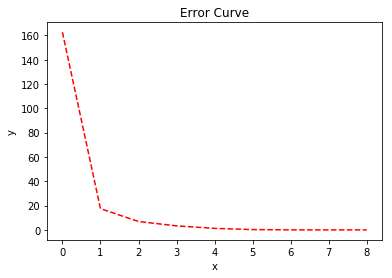

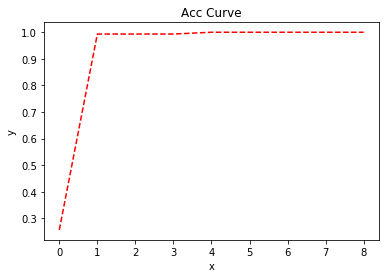

In [202]:
import matplotlib.pyplot as plt
# plot error and corresponding acc

plt.figure(0) 
plt.plot(range(epo_N), Err_ary, 'r--')
plt.title('Error Curve')
plt.xlabel('x')
plt.ylabel('y')
# save fig
# plt.savefig('Error_Curve.png')
plt.show()

plt.figure(1) 
plt.plot(range(epo_N), Acc_ary, 'r--')
plt.title('Acc Curve')
plt.xlabel('x')
plt.ylabel('y')
# save fig
# plt.savefig('Acc_Curve.png')
plt.show()

## Testing Stage
### test best W on test set

In [204]:
# Classification result of test data
y_pre = []
for n in range(testN):
    max_prob =  float("-inf")
    for c in range(classN):
        predict = yFunc(n,c,W_Best,xN_ts)
        if predict > max_prob:
            max_prob = predict
            max_idx = c
    y_pre.append(max_idx)
print('predict-result = ',y_pre)

predict-result =  [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## Plot the histogram of each variable in training data

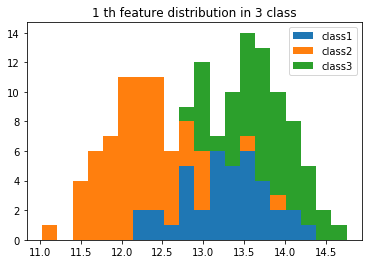

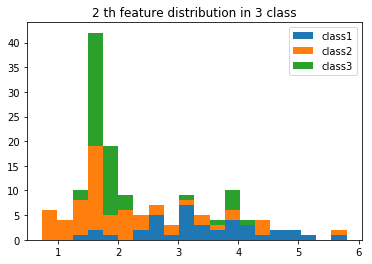

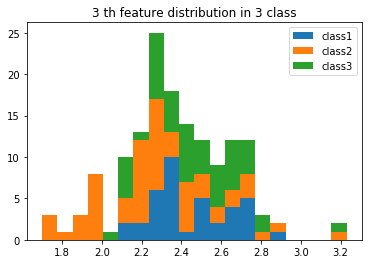

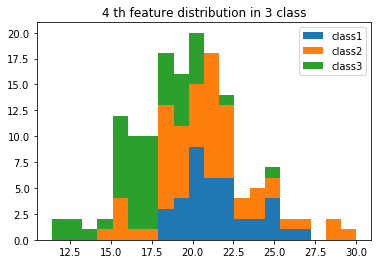

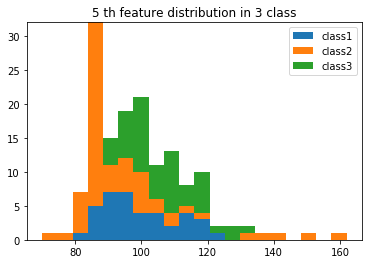

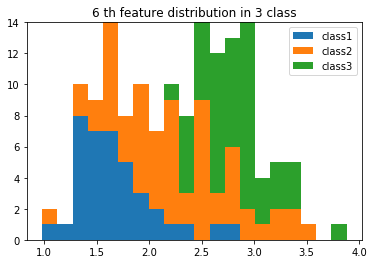

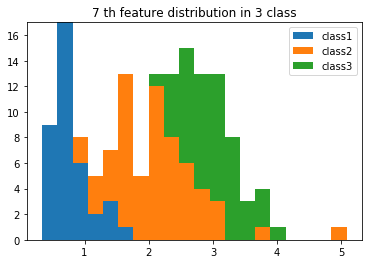

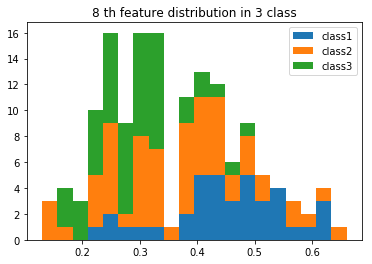

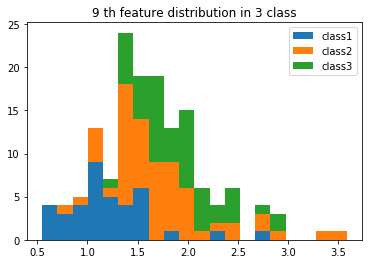

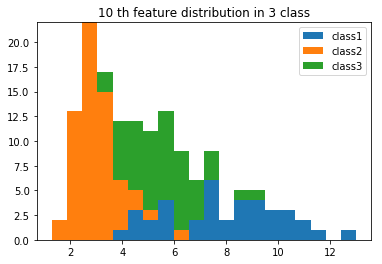

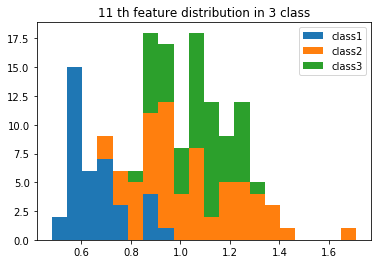

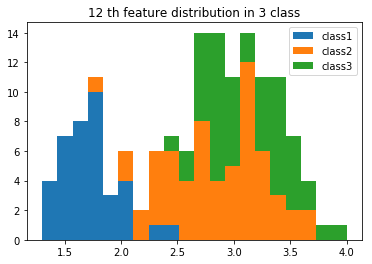

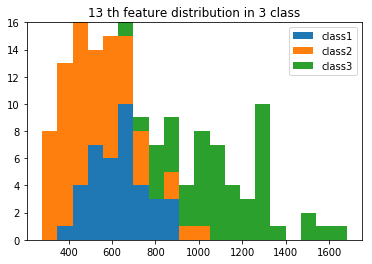

In [206]:
import numpy as np
import matplotlib.pyplot as plt

# remember which index(1~trainN) belongs to class1, class2, class3 correspondingly
class_idx_position = [[],[],[]]
for idx, ele in enumerate(gt_y):
    for c in range(classN):
        if ele == c:
            class_idx_position[c].append(idx)

for feature in range(feat_dim):
    plt.figure(feature)
    data = [[],[],[]]
    for c in range(classN):
        for idx, ele in enumerate(class_idx_position[c]):
            data[c].append(xN_tr[ele][feature])
            
    n_bins = 20
    plt.hist(data, n_bins, histtype='bar', stacked=True, label=['class1','class2','class3'])
    plt.legend(prop={'size': 10})
    plt.title('%s th feature distribution in %s class' % (str(feature+1),str(classN)))
    
    # save fig
    # plt.savefig('%s th feature' % (str(feature+1)))

    plt.show()